In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset to examine its structure
# Remove the extra double quotes from the file path
file_path = 'student_monnitoring_data.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
print("Dataset Info:")
print(data.info())

print("\nFirst 5 Rows:")
print(data.head())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student ID          15000 non-null  int64  
 1   Date                15000 non-null  object 
 2   Class Time          15000 non-null  object 
 3   Attendance Status   15000 non-null  object 
 4   Stress Level (GSR)  15000 non-null  float64
 5   Sleep Hours         15000 non-null  float64
 6   Anxiety Level       15000 non-null  int64  
 7   Mood Score          15000 non-null  int64  
 8   Risk Level          15000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.0+ MB
None

First 5 Rows:
   Student ID        Date   Class Time Attendance Status  Stress Level (GSR)  \
0           1  2024-12-01   9:00-15:00              Late                0.92   
1           1  2024-12-02   8:00-16:00              Late                1.17   
2           1  20

In [5]:
# Summary statistics of numeric columns
numeric_summary = data.describe()

# Check distribution of categorical variables
categorical_columns = ['Attendance Status', 'Risk Level']
categorical_distributions = {col: data[col].value_counts() for col in categorical_columns}

# Display results
print("Numeric Summary:")
print(numeric_summary)

print("\nCategorical Distributions:")
for col, dist in categorical_distributions.items():
    print(f"\n{col} Distribution:")
    print(dist)


Numeric Summary:
        Student ID  Stress Level (GSR)   Sleep Hours  Anxiety Level  \
count  15000.00000        15000.000000  15000.000000   15000.000000   
mean     250.50000            2.762538      6.996780       5.546867   
std      144.34209            1.301927      1.150973       2.870323   
min        1.00000            0.500000      5.000000       1.000000   
25%      125.75000            1.640000      6.000000       3.000000   
50%      250.50000            2.760000      7.000000       6.000000   
75%      375.25000            3.900000      8.000000       8.000000   
max      500.00000            5.000000      9.000000      10.000000   

         Mood Score  
count  15000.000000  
mean       5.471533  
std        2.868984  
min        1.000000  
25%        3.000000  
50%        5.000000  
75%        8.000000  
max       10.000000  

Categorical Distributions:

Attendance Status Distribution:
Attendance Status
Late       5032
Absent     5002
Present    4966
Name: count, dtype

In [6]:
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Student ID            0
Date                  0
Class Time            0
Attendance Status     0
Stress Level (GSR)    0
Sleep Hours           0
Anxiety Level         0
Mood Score            0
Risk Level            0
dtype: int64


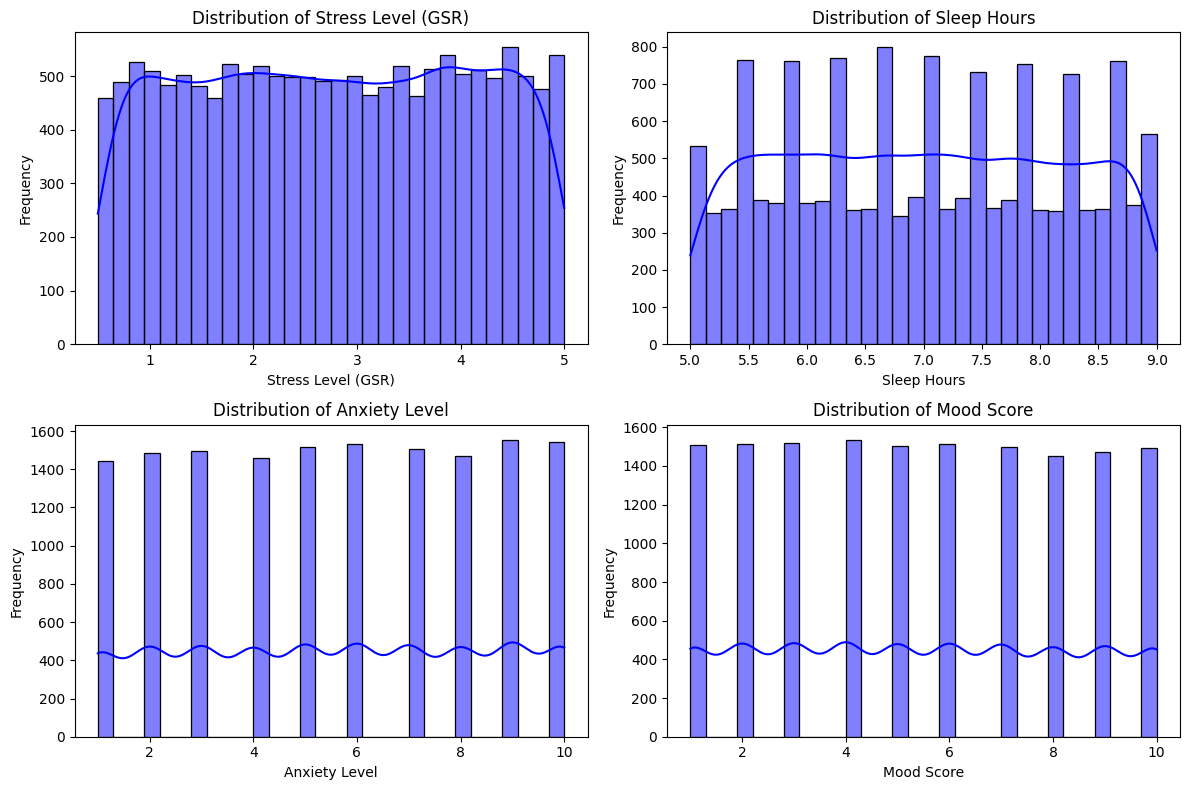

In [7]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Stress Level (GSR)', 'Sleep Hours', 'Anxiety Level', 'Mood Score'], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\snake\AppData\Local\Temp\ipykernel_20832\225053131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attendance Status', data=data, palette='coolwarm')


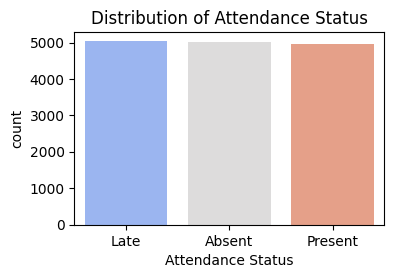

In [8]:
plt.figure(figsize=(4, 2.5))
sns.countplot(x='Attendance Status', data=data, palette='coolwarm')
plt.title('Distribution of Attendance Status')
plt.show()

# EDA insights
### Numeric Data :
Stress Level (GSR): Mean = 2.76, ranges from 0.5 to 5.0. Distribution appears right-skewed.

Sleep Hours: Mean = 7.0 hours, ranging from 5 to 9 hours, with a slight peak near 7 hours.

Anxiety Level: Mean = 5.55, ranging from 1 to 10. Distribution is somewhat uniform.

Mood Score: Mean = 5.47, with values between 1 and 10, showing a balanced distribution.

### Categorical Data
Attendance Status:

Late: 5,032 (33.5%)

Absent: 5,002 (33.3%)

Present: 4,966 (33.1%)

Classes are evenly distributed among the statuses.

### Risk Level:

High: 8,380 (55.9%)

Medium: 3,349 (22.3%)

Low: 3,271 (21.8%)

A significant portion of students fall under the "High" risk category.


In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data['Weekday'] = data['Date'].dt.day_name()

In [10]:
class_times_split = data['Class Time'].str.split('-', expand=True)
data['Class Start'] = pd.to_datetime(class_times_split[0], format='%H:%M').dt.time
data['Class End'] = pd.to_datetime(class_times_split[1], format='%H:%M').dt.time

In [11]:
numeric_columns = ['Stress Level (GSR)', 'Sleep Hours', 'Anxiety Level', 'Mood Score']
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

In [12]:
data['Attendance Status'] = data['Attendance Status'].map({'Present': 2, 'Late': 1, 'Absent': 0})
data['Risk Level'] = data['Risk Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [13]:
print("\nUpdated Data Info:")
print(data.info())


Updated Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Student ID          15000 non-null  int64         
 1   Date                15000 non-null  datetime64[ns]
 2   Class Time          15000 non-null  object        
 3   Attendance Status   15000 non-null  int64         
 4   Stress Level (GSR)  15000 non-null  float64       
 5   Sleep Hours         15000 non-null  float64       
 6   Anxiety Level       15000 non-null  int64         
 7   Mood Score          15000 non-null  int64         
 8   Risk Level          15000 non-null  int64         
 9   Weekday             15000 non-null  object        
 10  Class Start         15000 non-null  object        
 11  Class End           15000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.4+ MB
None


C:\Users\snake\AppData\Local\Temp\ipykernel_20832\4138260665.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk Level', y='Stress Level (GSR)', data=data, palette='coolwarm')


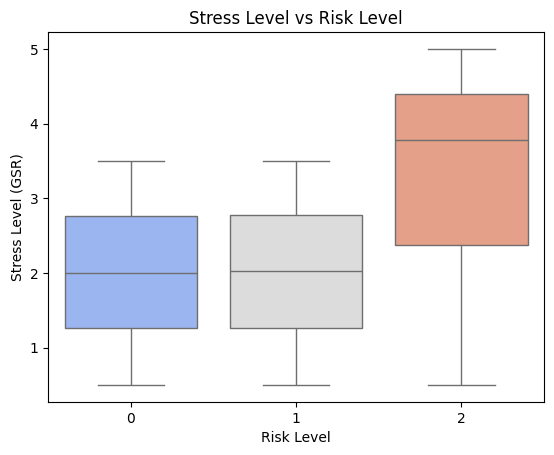

Risk Level
0    2.011052
1    2.017029
2    3.353805
Name: Stress Level (GSR), dtype: float64


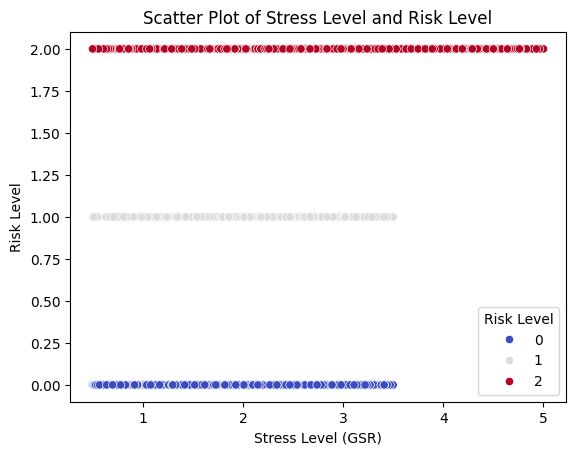

In [14]:
sns.boxplot(x='Risk Level', y='Stress Level (GSR)', data=data, palette='coolwarm')
plt.title('Stress Level vs Risk Level')
plt.show()

# Grouped Mean Stress Levels
grouped = data.groupby('Risk Level')['Stress Level (GSR)'].mean()
print(grouped)

# Scatter Plot
sns.scatterplot(x='Stress Level (GSR)', y='Risk Level', data=data, hue='Risk Level', palette='coolwarm')
plt.title('Scatter Plot of Stress Level and Risk Level')
plt.show()

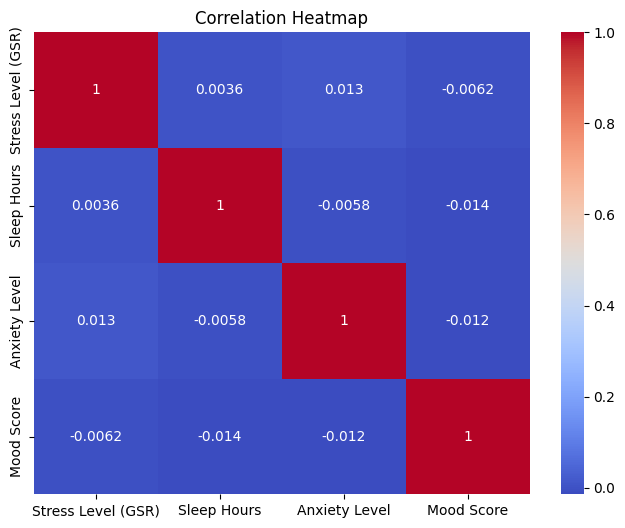

In [15]:
numerical_data = data[['Stress Level (GSR)', 'Sleep Hours', 'Anxiety Level', 'Mood Score']]
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


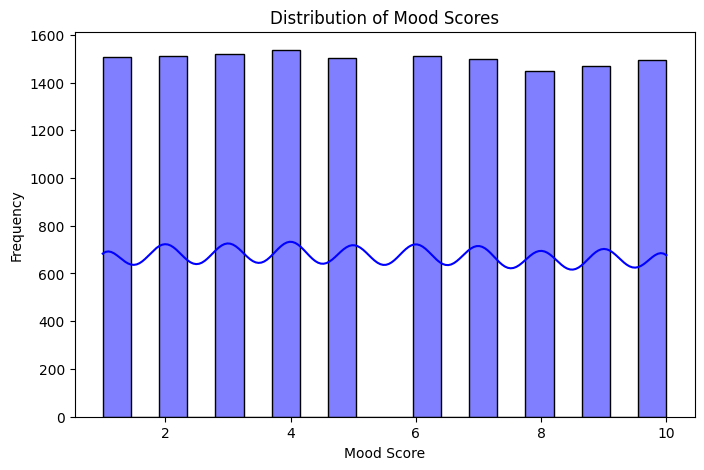

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Mood Score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Mood Scores')
plt.xlabel('Mood Score')
plt.ylabel('Frequency')
plt.show()